In [2]:
#importing packages
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from google.colab import files
upload = files.upload()

Saving test_image.pkl to test_image.pkl


In [5]:
upload = files.upload()

Saving train_image.pkl to train_image.pkl


In [7]:
upload = files.upload()

Saving train_label.pkl to train_label.pkl


In [0]:
with open('train_image.pkl', 'rb') as f:
    data_train = pickle.load(f)
data_train = np.asarray(data_train)

In [9]:
print(data_train.shape)

(8000, 784)


In [0]:
with open('test_image.pkl', 'rb') as f:
    data_test = pickle.load(f)
data_test = np.asarray(data_test)

In [11]:
print(data_test.shape)

(2000, 784)


In [0]:
with open('train_label.pkl', 'rb') as f:
    label_train = pickle.load(f)
label_train = np.asarray(label_train)

In [13]:
print(label_train.shape)

(8000,)


In [15]:
# finding unique labels and their counts
unique, counts = np.unique(label_train, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 2000]
 [   1 2000]
 [   2 2000]
 [   3 2000]]


In [0]:
#normalizing the label numbers

for i in range(len(label_train)):
    if label_train[i]==2:
        label_train[i]=1
    elif label_train[i]==3:
        label_train[i]=2
    elif label_train[i]==6:
        label_train[i]=3

In [0]:
data_train = data_train.reshape((8000,1,28,28))
data_test = data_test.reshape((2000,1,28,28))

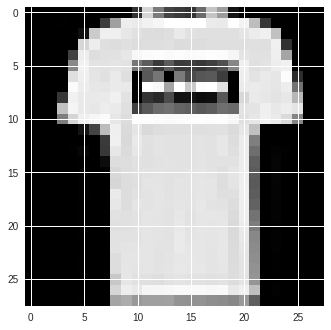

0


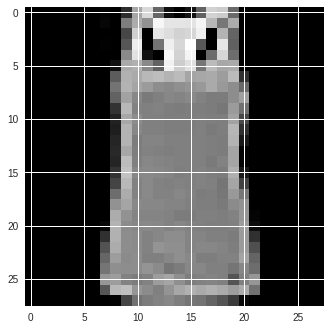

0


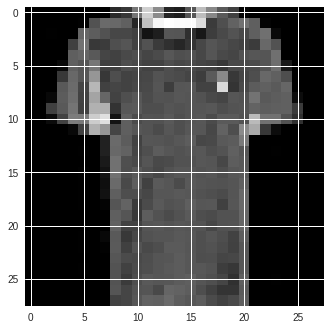

0


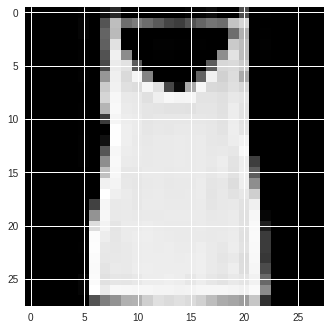

0


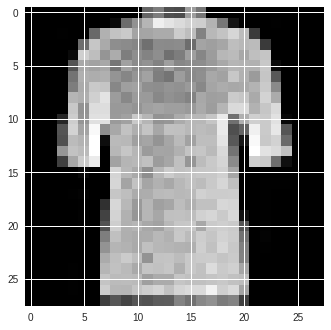

0


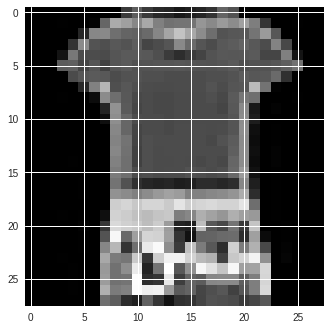

0


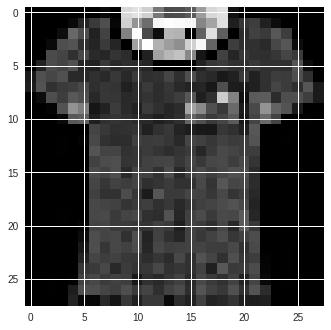

0


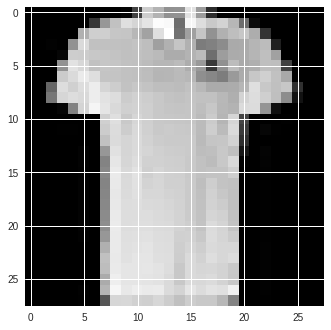

0


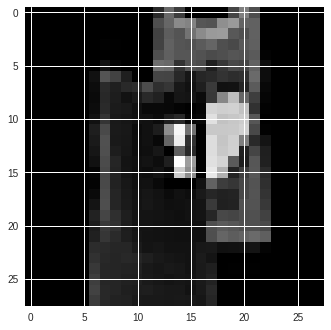

0


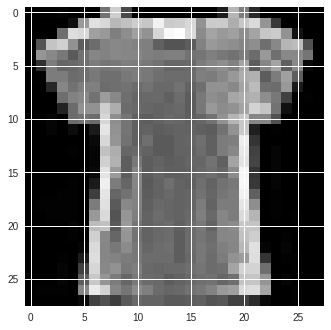

0


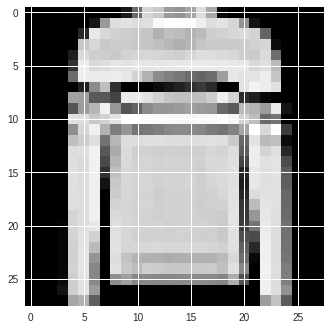

1


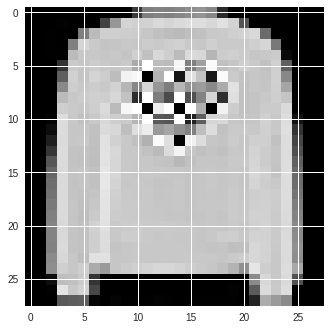

1


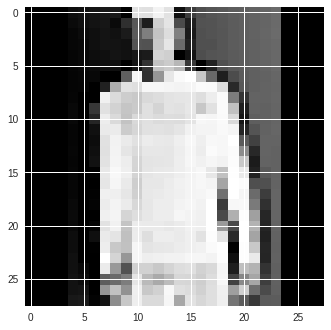

1


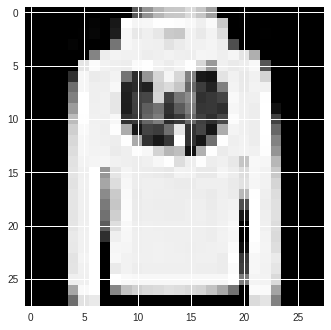

1


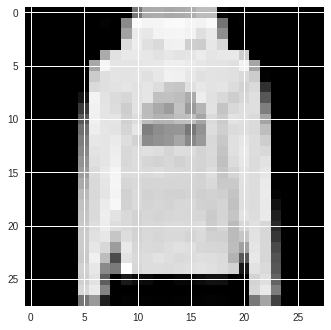

1


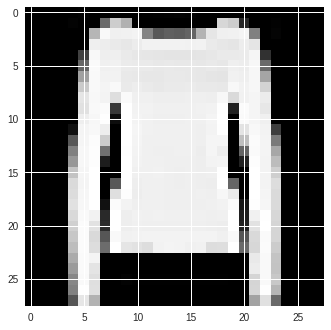

1


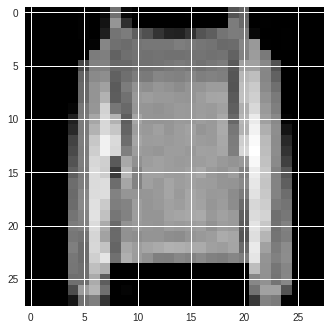

1


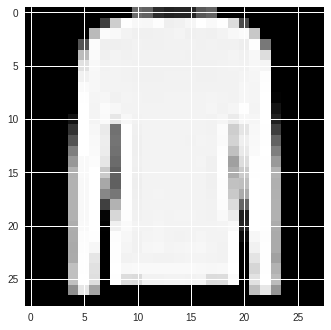

1


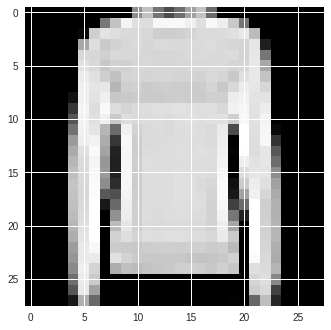

1


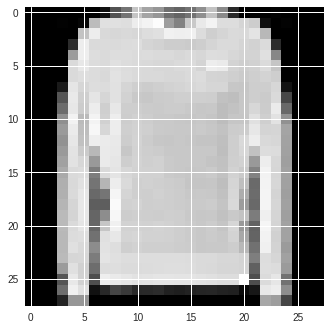

1


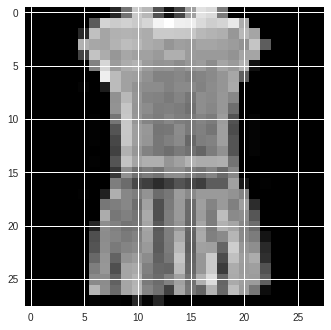

2


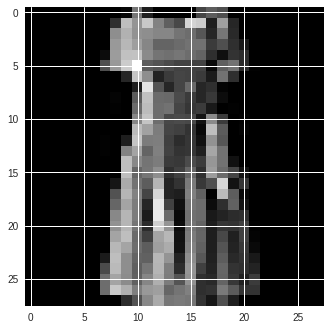

2


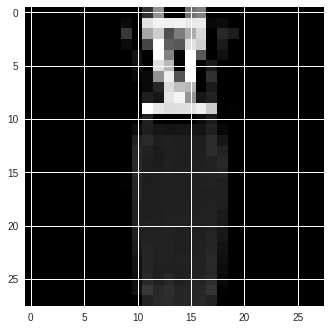

2


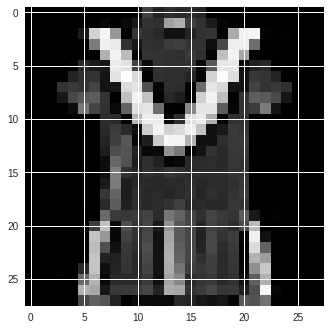

2


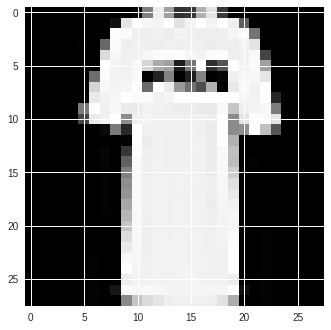

2


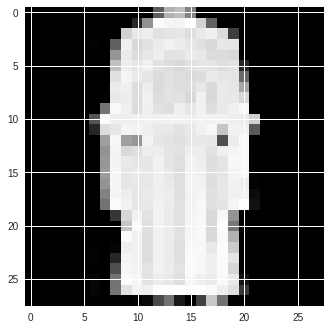

2


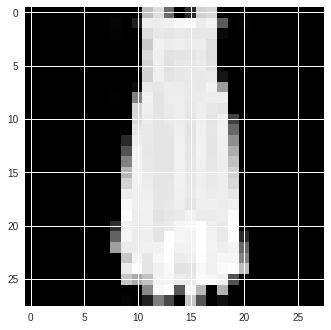

2


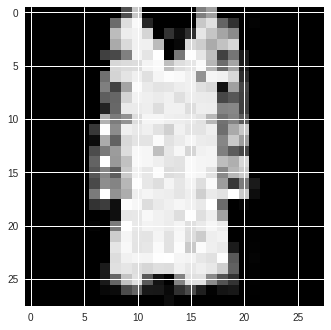

2


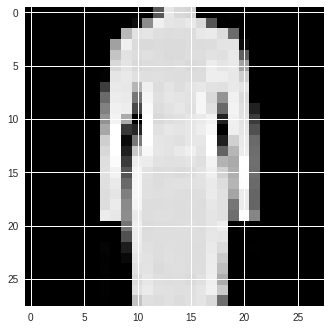

2


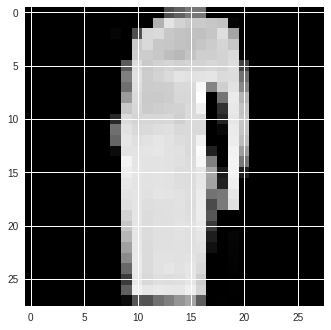

2


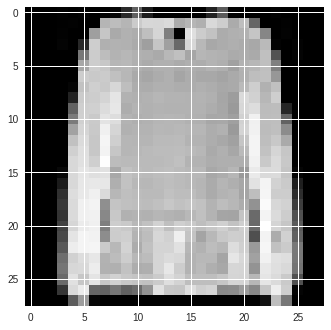

3


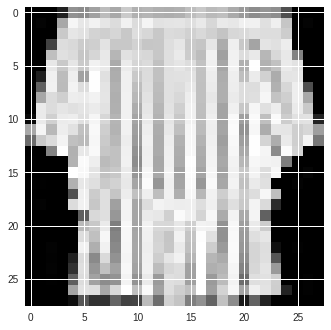

3


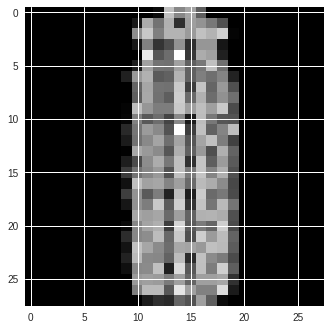

3


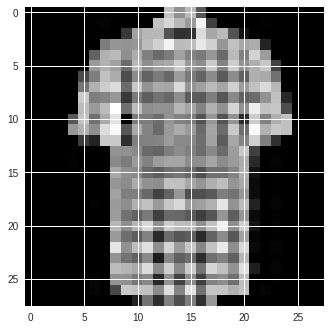

3


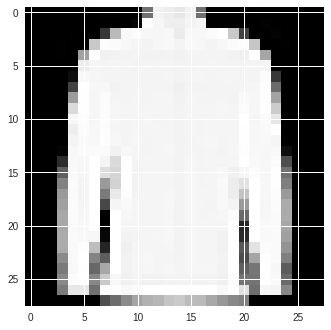

3


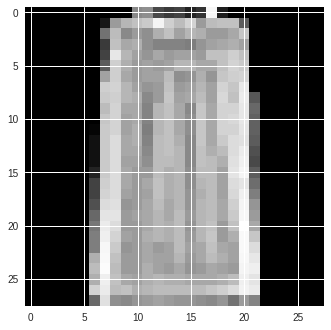

3


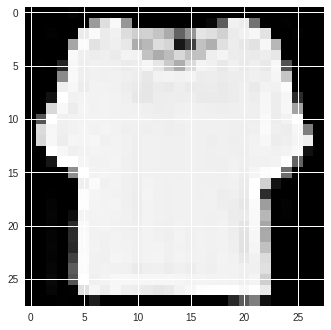

3


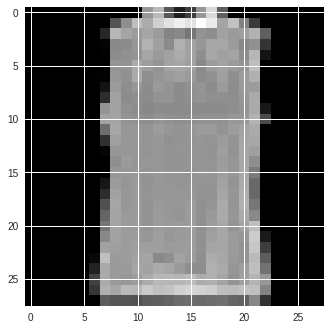

3


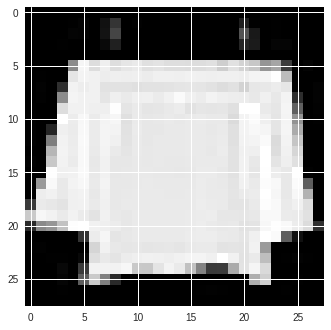

3


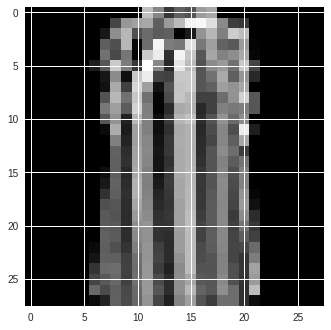

3


In [17]:
#visulaizing training images and their labels

for i in range(40):
    k = int((i/10)*2000 + (i%10))
    plt.imshow(data_train[k].reshape((28, 28)), cmap=cm.Greys_r)
    plt.show()
    print(label_train[k])

In [18]:
## categorical transforming the labels
from keras.utils import to_categorical
label_train_cat = to_categorical(label_train)
print(label_train_cat[0])
print(label_train_cat[2000])
print(label_train_cat[4000])
print(label_train_cat[6000])

Using TensorFlow backend.


[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


In [0]:
## importing pytorch deep learning packages 
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
import torchvision
import torch.utils.data
from torch.utils.data import Dataset
train_on_gpu = False
if(torch.cuda.is_available()):
    print("Training on GPU")
    train_on_gpu = True

In [0]:
# defining the CNN architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 4)
        self.dropout = nn.Dropout(0.30)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.softmax(self.fc2(x))
        return x

In [21]:
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=4, bias=True)
  (dropout): Dropout(p=0.3)
)


In [0]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.001)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

##transformer = transforms.Compose([
    ##transforms.ToTensor(),
    ##transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ##])

In [0]:
class Dataset(Dataset):
    
    def __init__(self, data_table, label_table, train):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.label_table = label_table
        self.data = data_table
        self.data_table = data_table
        self.train = train

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data = self.data_table[idx]
        sample = data.astype("float32") / 255.0
        sample = np.array(sample)
        if self.train:
            result = self.label_table[idx]

            return sample, result
        else:
            return sample

In [25]:
data = Dataset(data_table = data_train, label_table = label_train, train = True)
print(data[0])

(array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00392157, 0.        , 0.        , 0.        , 0.        ,
         0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
         0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00392157, 0.        ,
         0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
         0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
         1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
         0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
         0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
         0

In [0]:
num_workers = 0
batch_size = 16
valid_size = 0.125

train_data = Dataset(data_table = data_train, label_table = label_train, train = True)
test_data = Dataset(data_table = data_test, label_table = label_train, train = False)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, 
    num_workers=num_workers)

In [27]:
n_epochs = 35

valid_loss_min = np.Inf # track change in validation loss
train_loss = 0
valid_loss = 0

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        #tt = torch.tensor(target[0], requires_grad = True)
        loss = criterion(output,target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output,target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
        
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.7f} \tValidation Loss: {:.7f} '.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.7f} --> {:.7f}).  Saving model ...'.format(
        valid_loss_min,valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 	Training Loss: 1.2126229 	Validation Loss: 0.1731326 
Validation loss decreased (inf --> 0.1731326).  Saving model ...
Epoch: 2 	Training Loss: 1.2117982 	Validation Loss: 0.1729542 
Validation loss decreased (0.1731326 --> 0.1729542).  Saving model ...
Epoch: 3 	Training Loss: 1.2103568 	Validation Loss: 0.1727387 
Validation loss decreased (0.1729542 --> 0.1727387).  Saving model ...
Epoch: 4 	Training Loss: 1.2089786 	Validation Loss: 0.1725015 
Validation loss decreased (0.1727387 --> 0.1725015).  Saving model ...
Epoch: 5 	Training Loss: 1.2074862 	Validation Loss: 0.1722295 
Validation loss decreased (0.1725015 --> 0.1722295).  Saving model ...
Epoch: 6 	Training Loss: 1.2056457 	Validation Loss: 0.1719073 
Validation loss decreased (0.1722295 --> 0.1719073).  Saving model ...
Epoch: 7 	Training Loss: 1.2031921 	Validation Loss: 0.1715090 
Validation loss decreased (0.1719073 --> 0.1715090).  Saving model ...
Epoch: 8 	Training Loss: 1.2003616 	Validation Loss: 0.171003

In [29]:
model.load_state_dict(torch.load('model.pt'))
model.eval()
count = 0
submission = []
# iterate over test data
for data in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data = data.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    _, pred = torch.max(output, 1)
    row = []
    row.append(count)
    if pred==0:
        row.append(0)
    elif pred==1:
        row.append(2)
    elif pred==2:
        row.append(3)
    elif pred==3:
        row.append(6)
    submission.append(row)
    count += 1
    # calculate the batch loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:
x = submission
submission = pd.DataFrame(submission)
submission.to_csv("submission_new.csv", encoding='utf-8', index = False)